# Lecture 2: Data processing in Pandas library

[Data Visualization · 1-DAV-105](https://bbrejova.github.io/viz/)

Lecture by Broňa Brejová

## Tabular data

* We will often work with data in the form of tables.
* Columns represent different features / variables (príznaky, atribúty, veličiny, premenné).
* Rows represent different items / data points / observations (countries, people, dates of measurement, ...).
* A small example:

| Country | Region	| Population	| Area (km<sup>2</sup>) | Landlocked |
|--|--|--|--|--|
| Slovakia	| Europe	| 5450421	| 49035 | yes |
| Czech Republic	| Europe	| 10649800	| 78866 | yes |
| Hungary	| Europe	| 9772756	| 93030 | yes |
| Poland	| Europe	| 38386000	| 312696 | no |




## Pandas library

* [Pandas](https://pandas.pydata.org/) is a Python library for data manipulation and analysis.
* It is fast and has many functions for data import and export in various formats.
* [Documentation](https://pandas.pydata.org/pandas-docs/stable/), [overview](https://pandas.pydata.org/pandas-docs/stable/getting_started/overview.html#overview), [tutorial](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html)


Basic data structures 

* `Series`: 1D table, all elements of the same type. 
* `DataFrame`: 2D table, elements within each column of the same type.

**NumPy library**

* [NumPy](https://numpy.org/) is a library of efficient multi-dimensional arrays used for numerical computations.
* We will mostly use Pandas, but some NumPy functions will be useful.
* [Tutorial](https://numpy.org/devdocs/user/quickstart.html), [reference](https://numpy.org/devdocs/reference/index.html)


In [93]:
import numpy as np
import pandas as pd
from IPython.display import Markdown 
import matplotlib.pyplot as plt

### Creating Series and DataFrames

* Bellow we show two manual ways of creating a DataFrame containing the small table of countries above.
* The first way gets a Series for each column, the second way gets a dictionary (or a tuple) for each row.
* We will usually read tabular data from files, see an example in the second half this lecture.

In [94]:
countries = pd.Series(['Slovakia', 'Czech Republic', 'Hungary', 'Poland'])
regions = pd.Series(['Europe', 'Europe', 'Europe', 'Europe'])
populations = pd.Series([5450421, 10649800, 9772756, 38386000])
areas = pd.Series([49035, 78866, 93030, 312696])
landlocked = pd.Series([True, True, True, False])
table = pd.DataFrame({'country':countries,
                    'region':regions, 
                    'population':populations, 
                    'area':areas,
                    'landlocked':landlocked})
# display: special notebook command for pretty-printing data
display(table)

,country,region,population,area,landlocked
0,Slovakia,Europe,5450421,49035,True
1,Czech Republic,Europe,10649800,78866,True
2,Hungary,Europe,9772756,93030,True
3,Poland,Europe,38386000,312696,False


In [95]:
list_of_dicts = [
    {'country':'Slovakia', 'region':'Europe', 'population':5450421, 'area':49035, 'landlocked':True},
    {'country':'Czech Republic', 'region':'Europe', 'population':10649800, 'area':78866, 'landlocked':True},
    {'country':'Hungary', 'region':'Europe', 'population':9772756, 'area':93030, 'landlocked':True},
    {'country':'Poland', 'region':'Europe', 'population':38386000, 'area':312696, 'landlocked':False},
]
table_from_list = pd.DataFrame.from_records(list_of_dicts)
display(table_from_list)

,country,region,population,area,landlocked
0,Slovakia,Europe,5450421,49035,True
1,Czech Republic,Europe,10649800,78866,True
2,Hungary,Europe,9772756,93030,True
3,Poland,Europe,38386000,312696,False


### Accessing elements of Series and DataFrame by position

* Attribute `ndim` is the number of dimensions. E.g. `areas.ndim` is `1`, `table.ndim` is `2`.
* Attribute `shape` is a tuple holding the size in each dimension. E.g. `areas.shape` is `(4,)`, `table.shape` is `(4,5)`.
* Rows and columns are numbered 0, 1, ...
* To access a particular column / row, use `some_series.`[`iloc`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.iloc.html)`[row]` or `some_table.`[`iloc`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html)`[row, column]`.
* Rows and columns in `iloc` can be 
    * a single number e.g. `0`, 
    * a slice (range) e.g. `0:2` or `:` for everything, 
    * a list of positions e.g. `[0, 2, 3]` 
    * a list of boolean values `[True, False, True, True]`.
* The result is a single element or a Series / DataFrame of a smaller size.


In [96]:
display(Markdown("**table:**"), table)
display(Markdown("**table.iloc[1, 2]:**"), table.iloc[1, 2])
display(Markdown("**table.iloc[[0, 2, 3], 0:2]**"), table.iloc[[0, 2, 3],  0:2])
display(Markdown("**table.iloc[[True, False, True, True], :]**"), 
        table.iloc[[True, False, True, True], :])


**table:**

,country,region,population,area,landlocked
0,Slovakia,Europe,5450421,49035,True
1,Czech Republic,Europe,10649800,78866,True
2,Hungary,Europe,9772756,93030,True
3,Poland,Europe,38386000,312696,False


**table.iloc[1, 2]:**

10649800

**table.iloc[[0, 2, 3], 0:2]**

,country,region
0,Slovakia,Europe
2,Hungary,Europe
3,Poland,Europe


**table.iloc[[True, False, True, True], :]**

,country,region,population,area,landlocked
0,Slovakia,Europe,5450421,49035,True
2,Hungary,Europe,9772756,93030,True
3,Poland,Europe,38386000,312696,False


### Views vs. copies

* Accessing parts of tables by `iloc` may return a partial copy or simply a "view".
* If we later modify this result, it is not clear if the original table is modified.
* Direct assignment of new values to a part of the table works: `some_table.iloc[row, column] = new_value` modifies `some_table`.
* To copy a table, use `other_table = some_table.copy(deep=True)`. 

In [97]:
table2 = table.copy(deep=True)
# create a copy of the original table

table2.iloc[0,0] = 'Slovensko'
display(table2)
# table2 now has Slovensko instead of Slovakia

countries2 = table2.iloc[: , 0]
# countries2 is now a view or a copy of one column of table2
countries2.iloc[2] = 'Maďarsko'
display(table2)
# table2 now can have Hungary or Maďarsko
# we get a warning



,country,region,population,area,landlocked
0,Slovensko,Europe,5450421,49035,True
1,Czech Republic,Europe,10649800,78866,True
2,Hungary,Europe,9772756,93030,True
3,Poland,Europe,38386000,312696,False


/tmp/ipykernel_1087193/2667016646.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countries2.iloc[2] = 'Maďarsko'


,country,region,population,area,landlocked
0,Slovensko,Europe,5450421,49035,True
1,Czech Republic,Europe,10649800,78866,True
2,Maďarsko,Europe,9772756,93030,True
3,Poland,Europe,38386000,312696,False


### Inplace operations

* Many operations return a new table.
* If you do not need the original table, you can specify option `inplace=True`.
* The example below sorts a table by a specified column, returning a new table or replacing the old one.

In [98]:
# copy original table to table2
table2 = table.copy(deep=True)

# table3 is a copy of table2 sorted by population size
table3 = table2.sort_values(by="population")

# display both table2 and table3
display(Markdown("**Original table2:**"), table2)
display(Markdown("**Sorted table3:**"), table3)

# now change table2 to be sorted by name of the country
table2.sort_values(by="country", inplace=True)
display(Markdown("**Sorted table2:**"), table2)

**Original table2:**

,country,region,population,area,landlocked
0,Slovakia,Europe,5450421,49035,True
1,Czech Republic,Europe,10649800,78866,True
2,Hungary,Europe,9772756,93030,True
3,Poland,Europe,38386000,312696,False


**Sorted table3:**

,country,region,population,area,landlocked
0,Slovakia,Europe,5450421,49035,True
2,Hungary,Europe,9772756,93030,True
1,Czech Republic,Europe,10649800,78866,True
3,Poland,Europe,38386000,312696,False


**Sorted table2:**

,country,region,population,area,landlocked
1,Czech Republic,Europe,10649800,78866,True
2,Hungary,Europe,9772756,93030,True
3,Poland,Europe,38386000,312696,False
0,Slovakia,Europe,5450421,49035,True


### Indexes

* Rows and columns have both an integer location (0,1,2,...)  and an index (name).
* In our table, column names are `'country'`, `'region'` etc.
* We have not named rows, so a default location-based index was constructed.
    * See the sorted tables above—their index labels are kept from the original.
* Indexes can be obtained by attributes `index` and `columns`.
* We can set the country name as an index using [`set_index`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.set_index.html), the opposite is [`reset_index`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reset_index.html) (in Series, use [`set_axis`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.set_axis.html) and [`reset_index`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.reset_index.html)).
* Index can be more complex (multiindex), we will see later.



In [99]:
display(Markdown("**`table.columns` is an object of class `Index`:**"), 
        table.columns)
display(Markdown("**`table.columns.values` is an array of column names:**"), 
        table.columns.values)

display(Markdown("**`table.index.values` is an array of row names, "
                 + "here equal to location:**"),
        table.index.values)
display(Markdown("**`index` for Series `areas`:**"), areas.index.values)

display(Markdown("**`table` after setting country name as index:**"))
table2 = table.set_index('country')
display(table2)

display(Markdown("**`reset_index` will put the index back as a column:**"))
table3 = table2.reset_index()
display(table3)

**`table.columns` is an object of class `Index`:**

Index(['country', 'region', 'population', 'area', 'landlocked'], dtype='object')

**`table.columns.values` is an array of column names:**

array(['country', 'region', 'population', 'area', 'landlocked'],
      dtype=object)

**`table.index.values` is an array of row names, here equal to location:**

array([0, 1, 2, 3])

**`index` for Series `areas`:**

array([0, 1, 2, 3])

**`table` after setting country name as index:**

,region,population,area,landlocked
country,,,,
Slovakia,Europe,5450421,49035,True
Czech Republic,Europe,10649800,78866,True
Hungary,Europe,9772756,93030,True
Poland,Europe,38386000,312696,False


**`reset_index` will put the index back as a column:**

,country,region,population,area,landlocked
0,Slovakia,Europe,5450421,49035,True
1,Czech Republic,Europe,10649800,78866,True
2,Hungary,Europe,9772756,93030,True
3,Poland,Europe,38386000,312696,False


### Accessing elements by index

* Method `some_table.loc[row, column]` is an analog of `iloc`, but using indexes rather than locations.
* You can also use `[]`, and pandas will try to guess whether it is an index or location (but sometimes it may guess wrong, so it is better to use explict `iloc` and `loc`).
* Some examples for `Series`:

In [100]:
populations2 = populations.set_axis(countries)
display(Markdown("**`populations2` Series with index:**"), populations2)
display(Markdown("**`populations2.loc['Slovakia']`**:"), 
        populations2.loc['Slovakia'])
display(Markdown("**`populations2.loc[['Slovakia','Poland']]`**:"), 
        populations2.loc[['Slovakia','Poland']])

display(Markdown("**`populations2[1]` and `populations2['Czech Republic']`**:"))
display(populations2[1], populations2['Czech Republic'])

**`populations2` Series with index:**

Slovakia           5450421
Czech Republic    10649800
Hungary            9772756
Poland            38386000
dtype: int64

**`populations2.loc['Slovakia']`**:

5450421

**`populations2.loc[['Slovakia','Poland']]`**:

Slovakia     5450421
Poland      38386000
dtype: int64

**`populations2[1]` and `populations2['Czech Republic']`**:

10649800

10649800

### Operations and functions on Series

* Operations such as `+`, `*` can be applied on two Series, causing them to be used on each corresponding pair of elements. 
* For example, `populations / areas` will compute population density for each country.
* You can also use a single number (scalar) as an operand, e.g. `populations / 1e6` will get population in millions.
* NumPy also contains functions that can be applied to each element of a series, e.g. `np.log(populations)`.
* Relational operators such as `populations < 10e6` produce Series of boolean values.
    * Those can be then used in `[]` or `loc`.

In [101]:
# creating two Series with country as index
populations2 = populations.set_axis(countries)
areas2 = areas.set_axis(countries)
display(Markdown("**`populations2 / areas2`:**"), populations2 / areas2)
display(Markdown("**`populations2 / 1e6`:**"), populations2 / 1e6)
display(Markdown("**`populations2 > 10e6`:**"), populations2 > 10e6)
display(Markdown("**`areas2[populations2 > 10e6]`:**"), 
        areas2.loc[populations2 > 10e6])
display(Markdown("**`np.log10(populations2)`:**"), np.log10(populations2))

**`populations2 / areas2`:**

Slovakia          111.153686
Czech Republic    135.036644
Hungary           105.049511
Poland            122.758206
dtype: float64

**`populations2 / 1e6`:**

Slovakia           5.450421
Czech Republic    10.649800
Hungary            9.772756
Poland            38.386000
dtype: float64

**`populations2 > 10e6`:**

Slovakia          False
Czech Republic     True
Hungary           False
Poland             True
dtype: bool

**`areas2[populations2 > 10e6]`:**

Czech Republic     78866
Poland            312696
dtype: int64

**`np.log10(populations2)`:**

Slovakia          6.736430
Czech Republic    7.027341
Hungary           6.990017
Poland            7.584173
dtype: float64

**Beware:** when we combine two Series, e.g. by +, Pandas will use index, not position, to pair up elements. 

In [102]:
a = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
b = pd.Series([10, 20, 30], index=['c', 'a', 'e'])
c = pd.Series([100, 200])
display(Markdown("**Series a:**"), a)
display(Markdown("**Series b:**"), b)
display(Markdown("**Series c:**"), c)
display(Markdown("**Series a+b:**"), a + b)
display(Markdown("**Series a+c:**"), a + c)

**Series a:**

a    1
b    2
c    3
d    4
dtype: int64

**Series b:**

c    10
a    20
e    30
dtype: int64

**Series c:**

0    100
1    200
dtype: int64

**Series a+b:**

a    21.0
b     NaN
c    13.0
d     NaN
e     NaN
dtype: float64

**Series a+c:**

a   NaN
b   NaN
c   NaN
d   NaN
0   NaN
1   NaN
dtype: float64

### Working with DataFrame columns

* `DataFrame` is similar to a dictionary of `Series` objects (columns).
* For example, `table['area']` or `table.area` is the **column** of country areas.
* New columns can be added to a DataFrame: `table['density'] = table['population'] / table['area']`
* But `table[0:2]` are the first 2 **rows** of the table.
    * To be save, use `loc[]` / `iloc[]` rather than just `[]`.
* By `table[table['population'] > 1e7]` we get countries with more that 10 million people (CZ, PL).

In [103]:
display(Markdown("**`table['area']`:**"), table['area'])
display(Markdown("**`table.area`:**"), table.area)
display(Markdown("**Adding density:**"))
display(Markdown("`table['density'] = table['population'] / table['area']`"))
table['density'] = table['population'] / table['area']
display(Markdown("**`table[0:2]`:**"), table[0:2])
display(Markdown("**`table[table['population'] > 1e7]`:**"), 
        table[table['population'] > 1e7])

**`table['area']`:**

0     49035
1     78866
2     93030
3    312696
Name: area, dtype: int64

**`table.area`:**

0     49035
1     78866
2     93030
3    312696
Name: area, dtype: int64

**Adding density:**

`table['density'] = table['population'] / table['area']`

**`table[0:2]`:**

,country,region,population,area,landlocked,density
0,Slovakia,Europe,5450421,49035,True,111.153686
1,Czech Republic,Europe,10649800,78866,True,135.036644


**`table[table['population'] > 1e7]`:**

,country,region,population,area,landlocked,density
1,Czech Republic,Europe,10649800,78866,True,135.036644
3,Poland,Europe,38386000,312696,False,122.758206


### Selecting table rows with query

* Method [`query`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) is very useful for selecting `DataFrame` rows satisfying some properties.
* In examples below, `@` substitutes variable value.
* While `loc[]` and `iloc[]` raise an exception if the requested value is not found, `query` can return an empty table.

In [104]:
display(Markdown("**`table.query(\"country=='Slovakia'\")`:**"), 
        table.query("country=='Slovakia'"))

def get_country(table, country):
  """Get a given country from the table"""
  return table.query("country == @country")
display(Markdown("**The same but for Hungary and using a function:**"),
        get_country(table, 'Hungary'))

display(Markdown("**Query with an empty result:**")) 
display(Markdown("`table.query(\"population < 10e6 and not landlocked\")`:"))
display(table.query("population < 10e6 and not landlocked"))


**`table.query("country=='Slovakia'")`:**

,country,region,population,area,landlocked,density
0,Slovakia,Europe,5450421,49035,True,111.153686


**The same but for Hungary and using a function:**

,country,region,population,area,landlocked,density
2,Hungary,Europe,9772756,93030,True,105.049511


**Query with an empty result:**

`table.query("population < 10e6 and not landlocked")`:

,country,region,population,area,landlocked,density


### Importing and exporting data
* Import and export is possible using many [file formats](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html) (text-based CSV, JSON, HTML; binary Excel, HDF5 etc.).
* We will mostly use CSV (=comma separated values) format.
  * Each table row is one line of the file.
  * Columns are separated by commas.
  * Columns containing commas or end-of-line characters may be enclosed in quotation marks.
  * Sometimes a different column separator is used, e.g. tab `"\t"`.
* Writing our table to a csv file: `table.to_csv("countries.csv")`.
  * If run in Colab, this will create a temporary file, which you can save on your computer (see the right panel, tab Files).
* Conversely, `table2 = pd.read_csv("countries.csv", index_col=0)` will read data from the file to a new `DataFrame` called `table2`.
* Input and output functions allow you to set many optional arguments to tweak the format.

## Example: a table of country populations from the United Nations

* Obtained from the UN webpage https://data.un.org/
* We will read the table in CSV format directly from a URL.
* We need to play a bit with settings:
  * We skip the top two lines.
  * We supply our own (simpler) column names.
  * We specify character encoding (default is UTF8) and that thousands are separted by a comma in numerical values, such as 1,000,000.
  * Note that empty fields (missing values) are imported as `np.NaN`.

In [105]:
# original source:
# url = 'https://data.un.org/_Docs/SYB/CSV/SYB65_1_202209_Population,%20Surface%20Area%20and%20Density.csv'
# our local copy:
url = 'https://bbrejova.github.io/viz/data/Un_population.csv'
column_names = ['Region ID', 'Region', 'Year',
                'Series', 'Value', 'Footnotes', 'Source']
un_table = pd.read_csv(url, encoding='latin-1', names=column_names, 
                       skiprows=2, thousands=",")
# print the first 5 rows to check the result
un_table.head()

,Region ID,Region,Year,Series,Value,Footnotes,Source
0,1,"Total, all countries or areas",2010,Population mid-year estimates (millions),6985.60,NaN,"United Nations Population Division, New York, ..."
1,1,"Total, all countries or areas",2010,Population mid-year estimates for males (milli...,3514.41,NaN,"United Nations Population Division, New York, ..."
2,1,"Total, all countries or areas",2010,Population mid-year estimates for females (mil...,3471.20,NaN,"United Nations Population Division, New York, ..."
3,1,"Total, all countries or areas",2010,Sex ratio (males per 100 females),101.20,NaN,"United Nations Population Division, New York, ..."
4,1,"Total, all countries or areas",2010,Population aged 0 to 14 years old (percentage),27.10,NaN,"United Nations Population Division, New York, ..."


In [106]:
# print the last 5 rows, to see if the bottom looks ok
un_table.tail()  

,Region ID,Region,Year,Series,Value,Footnotes,Source
7868,716,Zimbabwe,2022,Population mid-year estimates for females (mil...,8.61,Projected estimate (medium fertility variant).,"United Nations Population Division, New York, ..."
7869,716,Zimbabwe,2022,Sex ratio (males per 100 females),89.40,Projected estimate (medium fertility variant).,"United Nations Population Division, New York, ..."
7870,716,Zimbabwe,2022,Population aged 0 to 14 years old (percentage),40.60,Projected estimate (medium fertility variant).,"United Nations Population Division, New York, ..."
7871,716,Zimbabwe,2022,Population aged 60+ years old (percentage),4.80,Projected estimate (medium fertility variant).,"United Nations Population Division, New York, ..."
7872,716,Zimbabwe,2022,Population density,42.20,Projected estimate (medium fertility variant).,"United Nations Population Division, New York, ..."


In [107]:
# check types of columns; strings are imported as object, which is expected
un_table.dtypes  

Region ID      int64
Region        object
Year           int64
Series        object
Value        float64
Footnotes     object
Source        object
dtype: object

* Each country has data for several years.
* There are several values per country and year, e.g. total population, the number of men and women, sizes of three age groups.
* The first part of the table contains various continents and regions, later individual countries arranged alphabetically from `'Afghanistan'` to `'Zimbabwe'`.

### A simple table with total population across years

We will create a simpler table `country_pop`.

* It will contain only countries, not regions.
* It will contain only rows with total population, all available years.
* It will contain columns `Country` (originally `Region`) ,`Year`, and `Population` (originally `Value`).

In [108]:
# get all rows for Afghanistan, choose the label for the first of them
first_country = un_table.query('Region == "Afghanistan"').index[0]
# get all rows from the first Afghanistan onwards and all columns
un_countries = un_table.iloc[first_country:, :]
# get only rows with total population and select only some columns using loc
country_pop = (un_countries
               .query('Series=="Population mid-year estimates (millions)"')
               .loc[:, ['Region', 'Year', 'Value']]
               .rename(columns={'Value':'Population', 'Region':'Country'}))
# print the start of the result
country_pop.head()

,Country,Year,Population
930,Afghanistan,2010,28.19
937,Afghanistan,2015,33.75
945,Afghanistan,2020,38.97
953,Afghanistan,2022,41.13
960,Albania,2010,2.91


## Tidy data, wide and long tables

* The original UN table has in column `Value` various values, including population size, sex ratio, population density, etc.
* In general, one column of a table should contain values of the same type.
* This is true in our `country_pop` table with columns `Country`, `Year`, and `Population`.
* This type of table is called **long** and is usually preferable.
* For some analysis, we may want to have countries as rows and years as columns; this is called a **wide table**.
* Pandas has methods to convert between the two formats, e.g. [`wide_to_long`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.wide_to_long.html), [`melt`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.melt.html#pandas.melt), [`pivot`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html#pandas.DataFrame.pivot), [`unstack`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.unstack.html#pandas.DataFrame.unstack) etc.

* See the article [Tidy data](https://www.jstatsoft.org/article/view/v059i10/v59i10.pdf) by Hadley Wickham for a longer discussion.

## Back to example: comparing populations in 2010 and 2022

* We select only two years from `country_pop`.
* Function [pivot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html) will use the column `Country` as the row index, values from column `Year` as new column names and values from column `Population` as values to populate the table itself.
* Finally we rename the columns so that they are strings starting with a letter; otherwise they are harder to be used in `query`.

In [109]:
display(Markdown("**Original `country_pop` table:**"), country_pop.head())


pop = (country_pop.query("Year==2010 or Year==2022")
       .pivot(index='Country', columns=['Year'], values='Population')
       .rename(columns={2010:'pop2010', 2022:'pop2022'}))

display(Markdown("**New `pop` table:**"), pop.head())

**Original `country_pop` table:**

,Country,Year,Population
930,Afghanistan,2010,28.19
937,Afghanistan,2015,33.75
945,Afghanistan,2020,38.97
953,Afghanistan,2022,41.13
960,Albania,2010,2.91


**New `pop` table:**

Year,pop2010,pop2022
Country,,
Afghanistan,28.19,41.13
Albania,2.91,2.84
Algeria,35.86,44.90
American Samoa,0.05,0.04
Andorra,0.07,0.08


In [110]:
# compute the difference between years for each country (positive = increase)
pop['difference'] = pop['pop2022'] - pop['pop2010']
# relative difference, as a fraction of population in 2010
#  (value 1 means 100% increase)
pop['relDifference'] = pop['difference'] / pop['pop2010']
pop.head()

Year,pop2010,pop2022,difference,relDifference
Country,,,,
Afghanistan,28.19,41.13,12.94,0.459028
Albania,2.91,2.84,-0.07,-0.024055
Algeria,35.86,44.90,9.04,0.252091
American Samoa,0.05,0.04,-0.01,-0.200000
Andorra,0.07,0.08,0.01,0.142857


Now we will use this table to create some plots and tables.

* What can you observe from these data displays?
* Are some of these visualizations more useful than others or are they complementary? How could we improve them?
* What other questions you could ask about this table and how would you answer them using plots or tables?

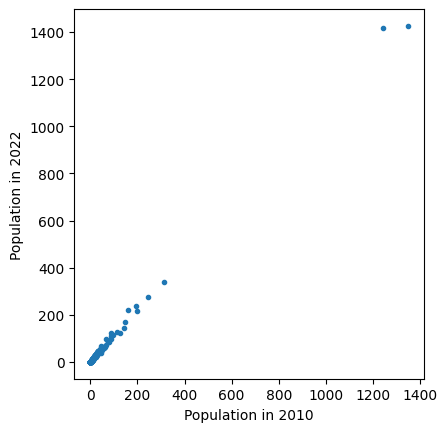

In [111]:
figure, axes = plt.subplots()
axes.plot(pop.pop2010, pop.pop2022, '.')
axes.set_aspect('equal')
axes.set_xlabel('Population in 2010')
axes.set_ylabel('Population in 2022')
pass

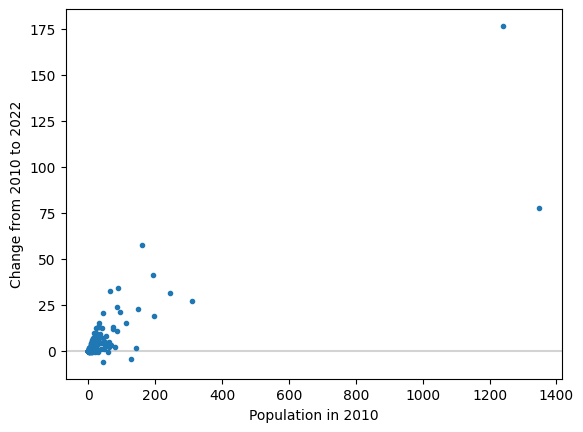

In [112]:
figure, axes = plt.subplots()
axes.axhline(0, color="lightgrey")
axes.plot(pop.pop2010, pop.difference, '.')
axes.set_xlabel('Population in 2010')
axes.set_ylabel('Change from 2010 to 2022')
pass

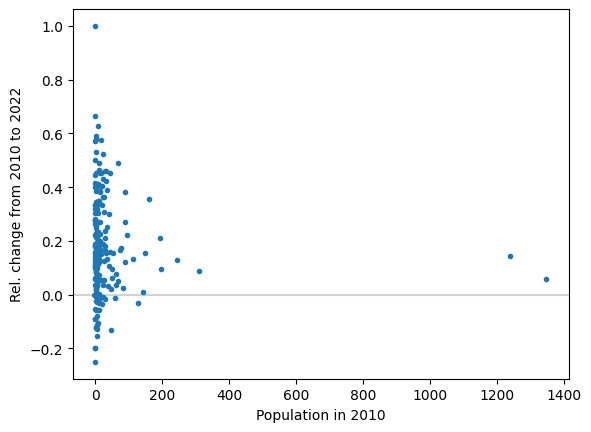

In [113]:
figure, axes = plt.subplots()
axes.axhline(0, color="lightgrey")
axes.plot(pop.pop2010, pop.relDifference, '.')
axes.set_xlabel('Population in 2010')
axes.set_ylabel('Rel. change from 2010 to 2022')
pass

In [114]:
pop.sort_values('relDifference').head(10)

Year,pop2010,pop2022,difference,relDifference
Country,,,,
Saint Martin (French part),0.04,0.03,-0.01,-0.250000
American Samoa,0.05,0.04,-0.01,-0.200000
Marshall Islands,0.05,0.04,-0.01,-0.200000
Bosnia and Herzegovina,3.81,3.23,-0.58,-0.152231
Ukraine,45.68,39.70,-5.98,-0.130911
Puerto Rico,3.72,3.25,-0.47,-0.126344
Lithuania,3.14,2.75,-0.39,-0.124204
Latvia,2.10,1.85,-0.25,-0.119048
Republic of Moldova,3.68,3.27,-0.41,-0.111413


In [115]:
pop.sort_values('relDifference', ascending=False).head(10)

Year,pop2010,pop2022,difference,relDifference
Country,,,,
Anguilla,0.01,0.02,0.01,1.000000
Turks and Caicos Islands,0.03,0.05,0.02,0.666667
Jordan,6.93,11.29,4.36,0.629149
Oman,2.88,4.58,1.70,0.590278
Qatar,1.71,2.70,0.99,0.578947
Niger,16.65,26.21,9.56,0.574174
Mayotte,0.21,0.33,0.12,0.571429
Equatorial Guinea,1.09,1.67,0.58,0.532110
Angola,23.36,35.59,12.23,0.523545


In [116]:
neighbor_countries = ['Slovakia','Czechia','Hungary','Poland','Austria','Ukraine'] 
neighbors = pop.loc[neighbor_countries, : ]
display(neighbors)

Year,pop2010,pop2022,difference,relDifference
Country,,,,
Slovakia,5.40,5.64,0.24,0.044444
Czechia,10.46,10.49,0.03,0.002868
Hungary,9.99,9.97,-0.02,-0.002002
Poland,38.60,39.86,1.26,0.032642
Austria,8.36,8.94,0.58,0.069378
Ukraine,45.68,39.70,-5.98,-0.130911


## Summary and outlook
* We will work mostly with tabular data.
* We will store them in `DataFrame` from Pandas library.
* This is more convenient and more efficient than regular Python lists.
* We have seen several functions for basic manipulation:
    * `iloc[]`, `loc[]`, `query`, `head`, `set_index`, `reset_index`, `rename`, `pivot`, `copy`, `sort_values`, operations and functions on `Series`.
* Next lecture will be focused on examples of different chart types.
* More Pandas later.